# "Statistical Data Analysis" Project 3

#### Step 1. Open the data file and study the general information
#### Step 2. Prepare the data

    Convert the data to the necessary types
    Find and eliminate errors in the data

Explain what errors you found and how you removed them. Note: many calls have a duration of 0.0 minutes. These might be missed calls. Whether or not to preprocess these values is up to you; assess how much their absence would affect the results of your analysis.
For each user, find:

    The number of calls made and minutes used per month
    The number of text messages sent per month
    The volume of data per month
    The monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)

#### Step 3. Analyze the data
Describe the customers' behavior. Find the minutes, texts, and volume of data the users of each plan require per month. Calculate the mean, dispersion, and standard deviation. Plot histograms. Describe the distributions.
Step 4. Test the hypotheses

    The average revenue from users of Ultimate and Surf calling plans differs.
    The average revenue from users in NY-NJ area is different from that of the users from other regions.

You decide what alpha value to use.
Explain:

    How you formulated the null and alternative hypotheses.
    What criterion you used to test the hypotheses and why.

#### Step 5. Write an overall conclusion
Format: Complete the task in Jupyter Notebook. Put the programming code in code cells and text explanations in markdown cells, then apply formatting and headings.

####  1. Opening the data file and studying the general information

In [1]:
import pandas as pd
import numpy as np
import datetime
import math
from functools import reduce
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    calls = pd.read_csv('megaline_calls.csv')
    internet = pd.read_csv('megaline_internet.csv')
    messages = pd.read_csv('megaline_messages.csv')
    plans = pd.read_csv('megaline_plans.csv')
    users = pd.read_csv('megaline_users.csv')

except:
    calls = pd.read_csv('/datasets/megaline_calls.csv')
    internet = pd.read_csv('/datasets/megaline_internet.csv')
    messages = pd.read_csv('/datasets/megaline_messages.csv')
    plans = pd.read_csv('/datasets/megaline_plans.csv')
    users = pd.read_csv('/datasets/megaline_users.csv')


In [3]:
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [4]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Here we should convert call_data from object to **datetime** format and  duration to **int**

In [5]:
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [6]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Here we should convert session_date from object to **datetime** 

In [7]:
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [8]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Here we should convert message_date from object to **datetime** 

In [9]:
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [10]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [12]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


####  2. Preparing the data

In [13]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['duration'] = [math.ceil(number) for number in calls['duration']]
calls['duration'] = calls['duration'].astype(int)
calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5
...,...,...,...,...
137730,1499_199,1499,2018-11-21,9
137731,1499_200,1499,2018-10-20,11
137732,1499_201,1499,2018-09-21,9
137733,1499_202,1499,2018-10-10,1


We converting **call_date** to **datetime** and **call_duration** from float to **int** data type

In [14]:
internet['session_date']

0         2018-12-29
1         2018-12-31
2         2018-12-28
3         2018-12-26
4         2018-12-27
             ...    
104820    2018-10-20
104821    2018-12-30
104822    2018-09-22
104823    2018-12-07
104824    2018-12-24
Name: session_date, Length: 104825, dtype: object

In [15]:

internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['month'] = internet['session_date'].dt.month
internet['year'] = internet['session_date'].dt.year 

We converting **session_date** column to **datetime** and adding **month**, **year** columns to the internet dataset

In [16]:
internet.head()

,id,user_id,session_date,mb_used,month,year
0,1000_13,1000,2018-12-29,89.86,12,2018
1,1000_204,1000,2018-12-31,0.00,12,2018
2,1000_379,1000,2018-12-28,660.40,12,2018
3,1000_413,1000,2018-12-26,270.99,12,2018
4,1000_442,1000,2018-12-27,880.22,12,2018


In [17]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
 5   year          104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 4.8+ MB


In [18]:
internet['year'].unique()

array([2018], dtype=int64)

We shol check if we talking about **one year** period

In [19]:
mb_to_gb = 1/1024
how_gb_used = internet.pivot_table(index = ['user_id','month'], values = 'mb_used', aggfunc ='sum').reset_index()
how_gb_used['gb_used'] = how_gb_used['mb_used'] * mb_to_gb
how_gb_used['gb_used'] = [math.ceil(number) for number in how_gb_used['gb_used']]
how_gb_used


,user_id,month,mb_used,gb_used
0,1000,12,1901.47,2
1,1001,8,6919.15,7
2,1001,9,13314.82,14
3,1001,10,22330.49,22
4,1001,11,18504.30,19
...,...,...,...,...
2272,1498,12,23137.69,23
2273,1499,9,12984.76,13
2274,1499,10,19492.43,20
2275,1499,11,16813.83,17


We making new dataset named **how_gb_used**, converting **Mb** to **Gb** and **rounding** up the gigabytes

In [20]:
how_gb_used.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  2277 non-null   int64  
 1   month    2277 non-null   int64  
 2   mb_used  2277 non-null   float64
 3   gb_used  2277 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 71.3 KB


In [21]:
how_gb_used

,user_id,month,mb_used,gb_used
0,1000,12,1901.47,2
1,1001,8,6919.15,7
2,1001,9,13314.82,14
3,1001,10,22330.49,22
4,1001,11,18504.30,19
...,...,...,...,...
2272,1498,12,23137.69,23
2273,1499,9,12984.76,13
2274,1499,10,19492.43,20
2275,1499,11,16813.83,17


In [22]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['message_date']

0       2018-12-27
1       2018-12-31
2       2018-12-31
3       2018-12-27
4       2018-12-26
           ...    
76046   2018-12-24
76047   2018-12-24
76048   2018-12-31
76049   2018-12-24
76050   2018-12-23
Name: message_date, Length: 76051, dtype: datetime64[ns]

We converting **message_date** to **datetime** fotmat

In [23]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [24]:
def plan_id(plan_name):
    if plan_name == 'surf':
        return 0
    elif plan_name == 'ultimate':
        return 1
    return 2
plans['plan_name_id'] = plans['plan_name'].apply(plan_id)
plans                              

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,plan_name_id
0,50,15360,500,20,10,0.03,0.03,surf,0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,1


We adding new column **plan_name_id** there we define **Surf plan = 0** and **Ultimate plan = 1**

In [25]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['plan_name_id'] = users['plan'].apply(plan_id)
users['churn_date'] = users['churn_date'].fillna(value='01/01/2019')
users['churn_date'] = pd.to_datetime(users['churn_date'])
users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,plan_name_id
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01,1
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2019-01-01,0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2019-01-01,0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2019-01-01,0
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,2019-01-01,0
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,2019-01-01,0
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,2019-01-01,1
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2019-01-01,0


We converting **reg_date** colump to **datetime** format, adding **plan_name_id column** to **users** dataset and filling **missing values** in the **churn_date** column with **01/01/2019**(users contract mast be longer, but for this project its ok to be this way), and also converting  **churn_date** to **datetime**.

In [26]:
users.query('age < 18')


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,plan_name_id


In [27]:
print(users['city'].unique())

['Atlanta-Sandy Springs-Roswell, GA MSA' 'Seattle-Tacoma-Bellevue, WA MSA'
 'Las Vegas-Henderson-Paradise, NV MSA' 'Tulsa, OK MSA'
 'Dallas-Fort Worth-Arlington, TX MSA'
 'San Francisco-Oakland-Berkeley, CA MSA' 'Grand Rapids-Kentwood, MI MSA'
 'Orlando-Kissimmee-Sanford, FL MSA'
 'San Jose-Sunnyvale-Santa Clara, CA MSA' 'Cleveland-Elyria, OH MSA'
 'Chicago-Naperville-Elgin, IL-IN-WI MSA' 'Knoxville, TN MSA'
 'New York-Newark-Jersey City, NY-NJ-PA MSA' 'Pittsburgh, PA MSA'
 'Fresno, CA MSA' 'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA'
 'Indianapolis-Carmel-Anderson, IN MSA' 'Jacksonville, FL MSA'
 'Los Angeles-Long Beach-Anaheim, CA MSA'
 'Omaha-Council Bluffs, NE-IA MSA'
 'Houston-The Woodlands-Sugar Land, TX MSA'
 'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA'
 'Tampa-St. Petersburg-Clearwater, FL MSA' 'Birmingham-Hoover, AL MSA'
 'Oklahoma City, OK MSA' 'Charlotte-Concord-Gastonia, NC-SC MSA'
 'Denver-Aurora-Lakewood, CO MSA'
 'Nashville-Davidson–Murfreesboro–Franklin, TN M

In [28]:
print(internet.query('mb_used == 0'))

              id  user_id session_date  mb_used  month  year
1       1000_204     1000   2018-12-31      0.0     12  2018
14       1001_26     1001   2018-09-17      0.0      9  2018
16       1001_28     1001   2018-10-17      0.0     10  2018
34       1001_54     1001   2018-09-02      0.0      9  2018
43       1001_77     1001   2018-10-31      0.0     10  2018
...          ...      ...          ...      ...    ...   ...
104797  1499_192     1499   2018-09-19      0.0      9  2018
104804  1499_199     1499   2018-12-09      0.0     12  2018
104816  1499_211     1499   2018-09-26      0.0      9  2018
104817  1499_212     1499   2018-09-11      0.0      9  2018
104823  1499_218     1499   2018-12-07      0.0     12  2018

[13747 rows x 6 columns]


In [29]:
print(calls.query('duration == 0'))

              id  user_id  call_date  duration
19        1001_4     1001 2018-12-05         0
25       1001_13     1001 2018-12-24         0
31       1001_30     1001 2018-10-17         0
32       1001_31     1001 2018-11-03         0
34       1001_35     1001 2018-12-21         0
...          ...      ...        ...       ...
137714  1499_183     1499 2018-11-10         0
137715  1499_184     1499 2018-09-15         0
137720  1499_189     1499 2018-12-27         0
137722  1499_191     1499 2018-12-24         0
137725  1499_194     1499 2018-10-31         0

[26834 rows x 4 columns]


**We chaked few more fings but cant cee anyfing that needs to be fixed right now**

 #### The number of calls made and minutes used per month

In [30]:
calls['month'] = calls['call_date'].dt.month

In [31]:

monthly_calls = calls.groupby(['user_id','month'])['id'].count().reset_index()




In [32]:
monthly_calls

,user_id,month,id
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [33]:
calls_lenght = calls.groupby(['user_id','month'])['duration'].sum()

calls_lenght

user_id  month
1000     12       124
1001     8        182
         9        315
         10       393
         11       426
                 ... 
1498     12       339
1499     9        346
         10       385
         11       308
         12       496
Name: duration, Length: 2258, dtype: int32

#### The number of text messages sent per month

In [34]:
messages['month'] = messages['message_date'].dt.month
monthly_messages = messages.groupby(['user_id','month']).count()

monthly_messages

id  message_date
user_id month                  
1000    12     11            11
1001    8      30            30
        9      44            44
        10     53            53
        11     36            36
...            ..           ...
1496    9      21            21
        10     18            18
        11     13            13
        12     11            11
1497    12     50            50

[1806 rows x 2 columns]

#### The volume of data per month

Previesly we made it in  **how_gb_used**

###  Now we starting to merge all datasets into one in case to calculate the monthly revenue from each user 

In [35]:
data_frames = [calls_lenght ,monthly_messages, how_gb_used]
user_usege = reduce(lambda left,right: pd.merge(left,right,on=['user_id', 'month'], how= 'outer'),data_frames)
user_usege.rename(columns = {"message_date": "messegess"}, inplace = True)


In [36]:
user_usege

,user_id,month,duration,id,messegess,mb_used,gb_used
0,1000,12,124.0,11.0,11.0,1901.47,2.0
1,1001,8,182.0,30.0,30.0,6919.15,7.0
2,1001,9,315.0,44.0,44.0,13314.82,14.0
3,1001,10,393.0,53.0,53.0,22330.49,22.0
4,1001,11,426.0,36.0,36.0,18504.30,19.0
...,...,...,...,...,...,...,...
2288,1349,12,NaN,61.0,61.0,13039.91,13.0
2289,1361,5,NaN,2.0,2.0,1519.69,2.0
2290,1482,10,NaN,2.0,2.0,NaN,NaN
2291,1108,12,NaN,NaN,NaN,233.17,1.0


In [37]:
data_frames_1 = [user_usege ,users]
user_usege = reduce(lambda left,right: pd.merge(left,right,on=['user_id'], how= 'outer'),data_frames_1)
user_usege

,user_id,month,duration,id,messegess,mb_used,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,plan_name_id
0,1000,12.0,124.0,11.0,11.0,1901.47,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01,1
1,1001,8.0,182.0,30.0,30.0,6919.15,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,0
2,1001,9.0,315.0,44.0,44.0,13314.82,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,0
3,1001,10.0,393.0,53.0,53.0,22330.49,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,0
4,1001,11.0,426.0,36.0,36.0,18504.30,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,NaN,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,2019-01-01,0
2299,1319,NaN,NaN,NaN,NaN,NaN,NaN,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,2019-01-01,0
2300,1378,NaN,NaN,NaN,NaN,NaN,NaN,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,2019-01-01,0
2301,1463,NaN,NaN,NaN,NaN,NaN,NaN,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,2019-01-01,1


### Here "0" means that user did not use this sertein service in this month and we filling NaN with "0"

In [38]:
user_usege = user_usege.fillna(value=0)
user_usege

,user_id,month,duration,id,messegess,mb_used,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,plan_name_id
0,1000,12.0,124.0,11.0,11.0,1901.47,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01,1
1,1001,8.0,182.0,30.0,30.0,6919.15,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,0
2,1001,9.0,315.0,44.0,44.0,13314.82,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,0
3,1001,10.0,393.0,53.0,53.0,22330.49,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,0
4,1001,11.0,426.0,36.0,36.0,18504.30,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,0.0,0.0,0.0,0.0,0.00,0.0,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,2019-01-01,0
2299,1319,0.0,0.0,0.0,0.0,0.00,0.0,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,2019-01-01,0
2300,1378,0.0,0.0,0.0,0.0,0.00,0.0,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,2019-01-01,0
2301,1463,0.0,0.0,0.0,0.0,0.00,0.0,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,2019-01-01,1


#### The final dataset

To calculate the total monthly revenue from each user we desided to create function **'cost'**:

In [39]:
def cost(row):
    duration = row['duration']
    messegess = row['messegess']
    mb_used = row['mb_used']
    gb_used = row['gb_used']
    plan = row['plan']
    plan_cost = 0
    messages_cost = 0
    calls_cost = 0
    gb_cost = 0
    gb_ulti = 30
    gb_surf = 15
 
    
   
    if plan =='ultimate':
        plan_cost = plans['usd_monthly_pay'].max()
    if duration > plans['minutes_included'].max():
        calls_cost = (duration - plans['minutes_included'].max()) * plans['usd_per_minute'].min()
    if messegess > plans['messages_included'].max():
        messages_cost = (messegess - plans['messages_included'].max()) * plans['usd_per_message'].min()
    if mb_used > plans['mb_per_month_included'].max():
        gb_cost = (gb_used - gb_surf) * plans['usd_per_gb'].min()
        
        
        
        
    elif plan =='surf':
        plan_cost = plans['usd_monthly_pay'].min()
    if duration > plans['minutes_included'].max():
        calls_cost = (duration - plans['minutes_included'].min()) * plans['usd_per_minute'].max()
    if messegess > plans['messages_included'].min():
                messages_cost = (messegess - plans['messages_included'].min()) * plans['usd_per_message'].max()
    if mb_used > plans['mb_per_month_included'].min():
                gb_cost = (gb_used - gb_surf) * plans['usd_per_gb'].min()   
    total_cost =  plan_cost + messages_cost +  calls_cost +  gb_cost
    return total_cost

#### Now we have to apply our 'cost' function to user_usages_final dataset and create new column 'total_cost':

In [40]:
user_usege['total_cost'] = user_usege.apply(cost , axis=1)

In [41]:
user_usege.reset_index()

,index,user_id,month,duration,id,messegess,mb_used,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,plan_name_id,total_cost
0,0,1000,12.0,124.0,11.0,11.0,1901.47,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01,1,70.00
1,1,1001,8.0,182.0,30.0,30.0,6919.15,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,0,20.00
2,2,1001,9.0,315.0,44.0,44.0,13314.82,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,0,20.00
3,3,1001,10.0,393.0,53.0,53.0,22330.49,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,0,69.09
4,4,1001,11.0,426.0,36.0,36.0,18504.30,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,0,48.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,2298,1307,0.0,0.0,0.0,0.0,0.00,0.0,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,2019-01-01,0,20.00
2299,2299,1319,0.0,0.0,0.0,0.0,0.00,0.0,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,2019-01-01,0,20.00
2300,2300,1378,0.0,0.0,0.0,0.0,0.00,0.0,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,2019-01-01,0,20.00
2301,2301,1463,0.0,0.0,0.0,0.0,0.00,0.0,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,2019-01-01,1,70.00


####  3. Analyzing the data

#### "Ultimate" Plan:

In [42]:
ultimate_users = user_usege.query('plan == "ultimate"')

Minutes:

<function matplotlib.pyplot.show(close=None, block=None)>

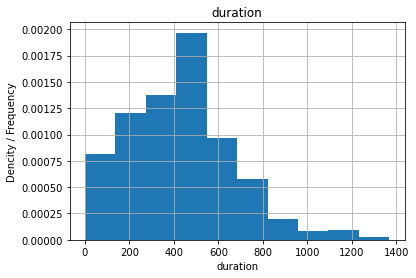

In [43]:
ultimate_minutes_mean = ultimate_users['duration'].mean()
ultimate_minutes_median = ultimate_users['duration'].median()
ultimate_minutes_varience = np.var(ultimate_users['duration'])
ultimate_minutes_st_deviation = np.sqrt(ultimate_minutes_varience)
ultimate_users.hist('duration', density= True)
plt.xlabel('duration')
plt.ylabel('Dencity / Frequency')
plt.show           

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

***I dont relly now what to write down here...Can you give me an example?***
</div>

<AxesSubplot:xlabel='duration'>

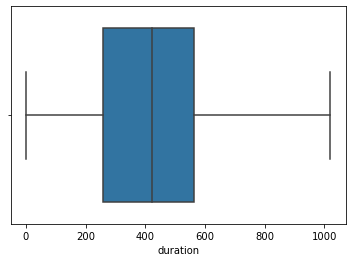

In [44]:
sns.boxplot(x = 'duration',data = ultimate_users, showfliers = False )

### Range of standart deviationg:    (μ−3σ,μ+3σ)

In [45]:
print('Ultimate minutes mean: ',ultimate_minutes_mean)
print('Ultimate minutes median: ',ultimate_minutes_median)
print('Ultimate minutes varience: ',ultimate_minutes_varience)
print('Ultimate minutes deviation: ',ultimate_minutes_st_deviation)
print('Almost all values (99.7%) can be found within the range: '
      ,ultimate_minutes_mean - 3* ultimate_minutes_st_deviation ,ultimate_minutes_mean + 3* ultimate_minutes_st_deviation )

Ultimate minutes mean:  428.0718232044199
Ultimate minutes median:  421.5
Ultimate minutes varience:  58463.01694087476
Ultimate minutes deviation:  241.79126729655636
Almost all values (99.7%) can be found within the range:  -297.30197868524914 1153.4456250940889


Messeges:
    

<function matplotlib.pyplot.show(close=None, block=None)>

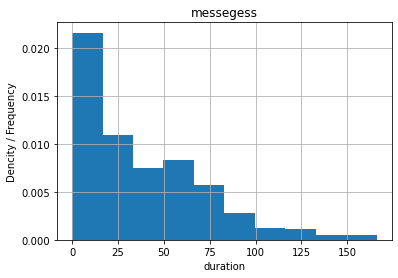

In [46]:
ultimate_messeges_mean = ultimate_users['messegess'].mean()
ultimate_messeges_median = ultimate_users['messegess'].median()
ultimate_messeges_varience = np.var(ultimate_users['messegess'])
ultimate_messeges_st_deviation = np.sqrt(ultimate_messeges_varience)
ultimate_users.hist('messegess', density= True)
plt.xlabel('duration')
plt.ylabel('Dencity / Frequency')
plt.show           

<AxesSubplot:xlabel='messegess'>

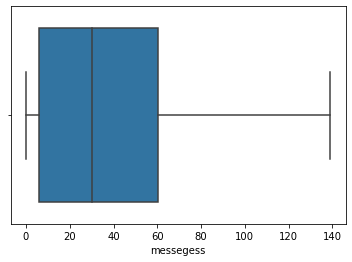

In [47]:
sns.boxplot(x = 'messegess',data = ultimate_users, showfliers = False )

In [48]:
print('Ultimate messeges mean: ',ultimate_messeges_mean)
print('Ultimate messeges median: ',ultimate_messeges_median)
print('Ultimate  messeges varience: ',ultimate_messeges_varience)
print('Ultimate  messeges standart deviation: ',ultimate_messeges_st_deviation)
print('Almost all values (99.7%) can be found within the range: '
      ,ultimate_messeges_mean - 3* ultimate_messeges_st_deviation ,ultimate_messeges_mean + 3* ultimate_messeges_st_deviation )

Ultimate messeges mean:  37.3439226519337
Ultimate messeges median:  30.0
Ultimate  messeges varience:  1208.1565790879347
Ultimate  messeges standart deviation:  34.75854684948631
Almost all values (99.7%) can be found within the range:  -66.93171789652521 141.61956320039263


Voolumes of data:

<function matplotlib.pyplot.show(close=None, block=None)>

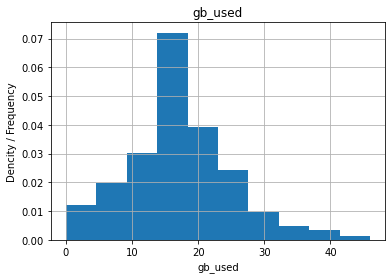

In [49]:
ultimate_surf_mean = ultimate_users['gb_used'].mean()
ultimate_surf_median = ultimate_users['gb_used'].median()
ultimate_surf_varience = np.var(ultimate_users['gb_used'])
ultimate_surf_st_deviation = np.sqrt(ultimate_messeges_varience)
ultimate_users.hist('gb_used', density= True)
plt.xlabel('gb_used')
plt.ylabel('Dencity / Frequency')
plt.show           

In [50]:
print('Ultimate surf mean: ',ultimate_surf_mean)
print('Ultimate surf median: ',ultimate_surf_median)
print('Ultimate  surf varience: ',ultimate_surf_varience)
print('Ultimate  surf standart deviation: ',ultimate_surf_st_deviation)
print('Almost all values (99.7%) can be found within the range: '
      ,ultimate_surf_mean - 3* ultimate_surf_st_deviation ,ultimate_surf_mean + 3* ultimate_surf_st_deviation)

Ultimate surf mean:  17.21132596685083
Ultimate surf median:  17.0
Ultimate  surf varience:  60.06998221971227
Ultimate  surf standart deviation:  34.75854684948631
Almost all values (99.7%) can be found within the range:  -87.0643145816081 121.48696651530975


<AxesSubplot:xlabel='gb_used'>

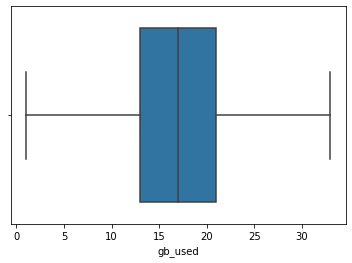

In [51]:
sns.boxplot(x = 'gb_used',data = ultimate_users, showfliers = False )

#### "Surf" Plan:

Minutes:

In [52]:
surf_users = user_usege.query('plan == "surf"')
surf_users.head(3)

,user_id,month,duration,id,messegess,mb_used,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,plan_name_id,total_cost
1,1001,8.0,182.0,30.0,30.0,6919.15,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,0,20.00
2,1001,9.0,315.0,44.0,44.0,13314.82,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,0,20.00
3,1001,10.0,393.0,53.0,53.0,22330.49,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,0,69.09


<function matplotlib.pyplot.show(close=None, block=None)>

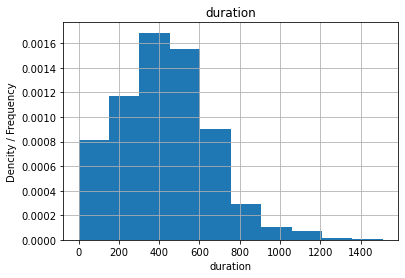

In [53]:
surf_minutes_mean = surf_users['duration'].mean()
surf_minutes_median = surf_users['duration'].median()
surf_minutes_varience = np.var(surf_users['duration'])
surf_minutes_st_deviation = np.sqrt(surf_minutes_varience)
surf_users.hist('duration', density= True)
plt.xlabel('duration')
plt.ylabel('Dencity / Frequency')
plt.show           

In [54]:
print('Surf minutes mean: ',surf_minutes_mean)
print('Surf minutes median: ',surf_minutes_median)
print('Surf minutes varience: ',surf_minutes_varience)
print('Surf minutes standart deviation: ',surf_minutes_st_deviation)
print('Almost all values (99.7%) can be found within the range: '
      ,surf_minutes_mean - 3* surf_minutes_st_deviation ,surf_minutes_mean + 3* surf_minutes_st_deviation )

Surf minutes mean:  427.12032932235593
Surf minutes median:  424.0
Surf minutes varience:  55420.45670514796
Surf minutes standart deviation:  235.41549801393273
Almost all values (99.7%) can be found within the range:  -279.1261647194423 1133.3668233641542


<AxesSubplot:xlabel='duration'>

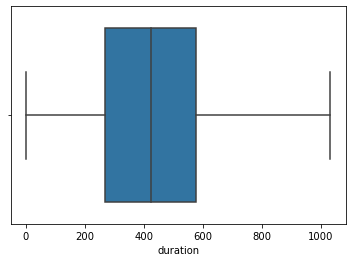

In [55]:
sns.boxplot(x = 'duration',data = surf_users, showfliers = False )

Messeges:

<function matplotlib.pyplot.show(close=None, block=None)>

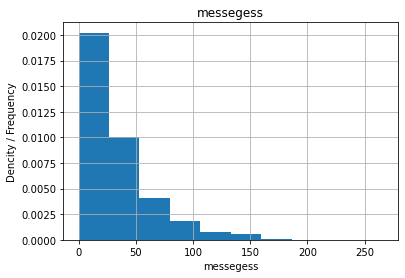

In [56]:
surf_messeges_mean = surf_users['messegess'].mean()
surf_messeges_median = surf_users['messegess'].median()
surf_messeges_varience = np.var(surf_users['messegess'])
surf_messeges_st_deviation = np.sqrt(surf_messeges_varience)
surf_users.hist('messegess', density= True)
plt.xlabel('messegess')
plt.ylabel('Dencity / Frequency')
plt.show           

In [57]:
print('Surf messeges mean: ',surf_messeges_mean)
print('Surf messeges median: ',surf_messeges_median)
print('Surf messeges varience: ',surf_messeges_varience)
print('Surf messeges standart deviation: ',surf_messeges_st_deviation)
print('Almost all values (99.7%) can be found within the range: '
      ,surf_messeges_mean - 3* surf_messeges_st_deviation ,surf_messeges_mean + 3* surf_messeges_st_deviation )

Surf messeges mean:  31.041165294490185
Surf messeges median:  24.0
Surf messeges varience:  1125.4048918656451
Surf messeges standart deviation:  33.54705489108761
Almost all values (99.7%) can be found within the range:  -69.59999937877265 131.68232996775302


<AxesSubplot:xlabel='messegess'>

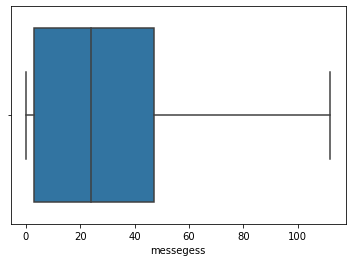

In [58]:
sns.boxplot(x = 'messegess',data = surf_users, showfliers = False )

Voolumes of data:

<function matplotlib.pyplot.show(close=None, block=None)>

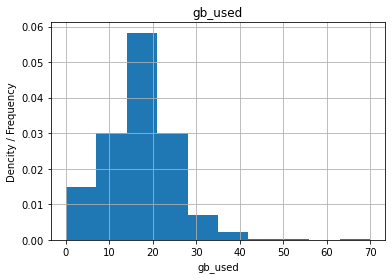

In [59]:
surf_surf_mean = surf_users['gb_used'].mean()
surf_surf_median = surf_users['gb_used'].median()
surf_surf_varience = np.var(surf_users['gb_used'])
surf_surf_st_deviation = np.sqrt(surf_surf_varience)
surf_users.hist('gb_used', density= True)
plt.xlabel('gb_used')
plt.ylabel('Dencity / Frequency')
plt.show           

<AxesSubplot:xlabel='gb_used'>

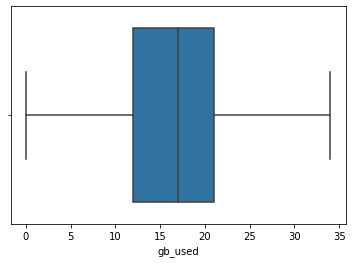

In [60]:
sns.boxplot(x = 'gb_used',data = surf_users, showfliers = False )

In [61]:
print('Surf surf mean: ',surf_surf_mean)
print('Surf surf median: ',surf_surf_median)
print('Surf surf varience: ',surf_surf_varience)
print('Surf surf standart deviation: ',surf_surf_st_deviation)
print('Almost all values (99.7%) can be found within the range: '
      ,surf_surf_mean - 3* surf_surf_st_deviation ,surf_surf_mean + 3* surf_surf_st_deviation )

Surf surf mean:  16.60734642178594
Surf surf median:  17.0
Surf surf varience:  62.36260594142332
Surf surf standart deviation:  7.896999806345655
Almost all values (99.7%) can be found within the range:  -7.083652997251026 40.298345840822904


### We can cee that in both our plans "Gb usage" affects ours plans most, than after that "Calls Duration" and the last "Messegess" - have minor effect.

### Comparing of two plans:

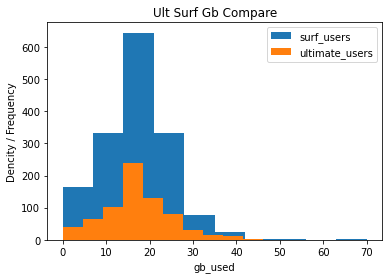

In [62]:
surf_users['gb_used'].plot(kind = 'hist')
ultimate_users['gb_used'].plot(kind = 'hist')
plt.title('Ult Surf Gb Compare')
plt.xlabel('gb_used')
plt.ylabel('Dencity / Frequency')
plt.legend(['surf_users','ultimate_users'])

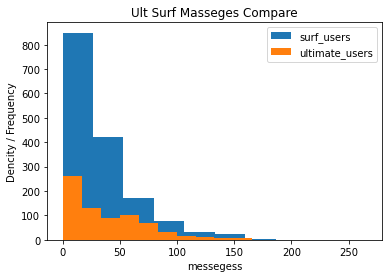

In [63]:
surf_users['messegess'].plot(kind = 'hist')
ultimate_users['messegess'].plot(kind = 'hist')
plt.title('Ult Surf Masseges Compare')
plt.xlabel('messegess')
plt.ylabel('Dencity / Frequency')
plt.legend(['surf_users','ultimate_users'])

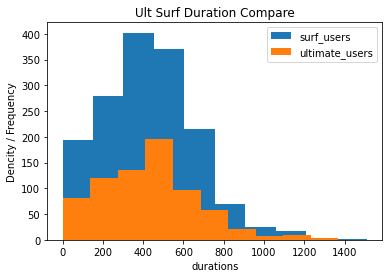

In [64]:
surf_users['duration'].plot(kind = 'hist')
ultimate_users['duration'].plot(kind = 'hist')
plt.title('Ult Surf Duration Compare')
plt.xlabel('durations')
plt.ylabel('Dencity / Frequency')
plt.legend(['surf_users','ultimate_users'])

Text(0, 0.5, 'Total Cost')

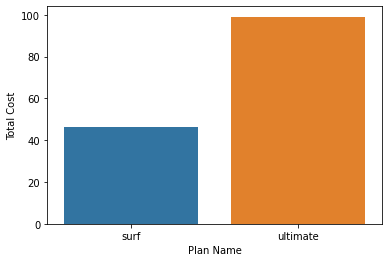

In [65]:
user_usages_compare=user_usege.groupby(['plan'])['total_cost'].agg('mean').reset_index()
plt.figure()
sns.barplot(x="plan", y="total_cost", data=user_usages_compare)
plt.xlabel('Plan Name')
plt.ylabel('Total Cost')

#### From our analysation we can cee that "Ultimate" plan shold be more profitable for Megaline than "Surf" plan

#### 4. Testing the hypotheses H0 and H1

**Null hypothesis:**

1.The average revenue from users of Ultimate and Surf calling plans are **equal**.
<br>
2.The average revenue from users in NY-NJ area is **equal** to the users from other regions.

    

**Alternative hypothesis:**

1.The average revenue from users of Ultimate and Surf calling plans are **different**.
<br>
2.The average revenue from users in NY-NJ area is **different** from the users from other regions.

    

#### Testing first hypothes:

****The average revenue from users of Ultimate and Surf calling plans are equal.****

At firt we running **Levene test** to deside if our **equal_var** will be **True** ore **False**

In [66]:
st.levene(surf_users['total_cost'],ultimate_users['total_cost'], center = 'mean' )

LeveneResult(statistic=8.873772024345191, pvalue=0.002923221260587695)

**pvalue** is very small so **equal_var = False**

In [67]:
alpha = 0.005
results = st.ttest_ind(surf_users['total_cost'], ultimate_users['total_cost'], equal_var = False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis") 

p-value:  7.184633029177272e-154
We reject the null hypothesis


As we cee the datasets are **not equal**

#### Testing second hypothes:

****The average revenue from users of Ultimate and Surf calling plans are equal.****

In [68]:
ny_nj_users = user_usege[user_usege['city'].str.contains("NY-NJ")]
ny_nj_users.head()


,user_id,month,duration,id,messegess,mb_used,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,plan_name_id,total_cost
56,1014,11.0,163.0,9.0,9.0,1175.59,2.0,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,surf,2019-01-01,0,20.00
57,1014,12.0,1114.0,64.0,64.0,7792.41,8.0,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,surf,2019-01-01,0,20.42
75,1022,5.0,302.0,0.0,0.0,4908.08,5.0,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,0,20.00
76,1022,6.0,490.0,0.0,0.0,23436.48,23.0,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,0,76.00
77,1022,7.0,475.0,0.0,0.0,9933.15,10.0,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,0,20.00


In [69]:
other_regions = user_usege[-user_usege['city'].str.contains("NY-NJ")]
other_regions.head()


,user_id,month,duration,id,messegess,mb_used,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,plan_name_id,total_cost
0,1000,12.0,124.0,11.0,11.0,1901.47,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01,1,70.00
1,1001,8.0,182.0,30.0,30.0,6919.15,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,0,20.00
2,1001,9.0,315.0,44.0,44.0,13314.82,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,0,20.00
3,1001,10.0,393.0,53.0,53.0,22330.49,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,0,69.09
4,1001,11.0,426.0,36.0,36.0,18504.30,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,0,48.00


In [70]:
st.levene(ny_nj_users['total_cost'],other_regions['total_cost'], center = 'mean' )

LeveneResult(statistic=1.5603030691068207, pvalue=0.21174790608959174)

**pvalue** is relatively  big so **equal_var = True**

In [71]:
alpha = 0.005

results = st.ttest_ind(ny_nj_users['total_cost'], other_regions['total_cost'], equal_var = True)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis") 

p-value:  0.00013122452625262358
We reject the null hypothesis


As we cee the NY_NJ and Other user are **not equal**

### 5. Overall conclusion

#### Step 1. Opening the data file and studying the general informationH
In the first step we opened our datasets and examinated them. We descovered that we should convert the dates in our datasets from **object** to **datetime** format. And also we have to convert **float** to **int** datatype in few datasets.

#### Step 2. Preparing the data


We converting **call_date** to **datetime** and **call_duration** from **float** to **int** data type
<br>
We converting **session_date** column to **datetime** and adding **month**, **year** columns to the **internet** dataset
<br>    
We shold check if we talking about one year period
<br> 
We making new dataset named **how_gb_used**, converting **Mb to Gb** and **rounding** up the gigabytes
<br> 
We converting **message_date** to **datetime** fotmat
<br> 
We adding new column **plan_name_id** there we define **Surf plan = 0** and **Ultimate plan = 1**
<br> 
We converting **reg_date** colump to **datetime** format, adding **plan_name_id** column to users dataset and filling missing values in the **churn_date column** with **01/01/2019**(users contract mast be longer, but for this project its ok to be this way), and also converting **churn_date** to **datetime**.
<br>
**We chaked few more fings but cant cee anyfing that needs to be fixed right now**

#### For each user we finding:

####     1. The number of calls made and minutes used per month

####     2.  The number of text messages sent per month

####     3. The volume of data per month

We merged all datasets into one in case to calculate the monthly revenue from each user and as the resolt we have got the final dataset **user_usages_final**


To calculate the total monthly revenue from each user we desided to create function **'cost'**:
####  We  applyed our 'cost' function to user_usages_final dataset and create new column 'total_cost':

#### Step 3. Analyzing the data
We analysed our data and discovered that that **"Ultimate" plan shold be more profitable for Megaline than "Surf" plan**

#### Step 4. Testing the hypotheses
Null hypothesis:
<b/>
1.The average revenue from users of Ultimate and Surf calling plans are equal.
2.The average revenue from users in NY-NJ area is equal to the users from other regions.

**Testing first hypothes:
The average revenue from users of Ultimate and Surf calling plans are equal.**

At firt we running Levene test to deside if our equal_var will be True ore False
**pvalue** is very small so equal_var = False


As we cee the datasets are **not equal**

**Testing second hypothes:
The average revenue from users of Ultimate and Surf calling plans are equal.**

**pvalue** is relatively big so equal_var = True

As we cee the NY_NJ and Other user **are not equal**